In [1]:
from utility.readCsvFile import openCSVFile, readAllCSVFile, readRedTeam
import numpy as np

In [2]:
#mapnames to numbers
#mapUserComputerList[number] = name
mapUserComputerList = []

In [3]:
#test
data,_ = openCSVFile("data/authpartitionaa", mapUserComputerList)
print(data)

[[0, 0, 0], [1, 1, 0], [2, 2, 0], [3, 3, 0], [4, 4, 0], [5, 5, 0], [1, 1, 0], [6, 6, 0], [7, 7, 0], [8, 8, 0], [9, 9, 0], [10, 10, 0], [11, 11, 0], [12, 12, 0], [13, 13, 0], [1, 1, 0], [14, 14, 0], [0, 0, 0], [15, 15, 0], [16, 16, 0], [17, 17, 0], [18, 18, 0], [18, 18, 0], [18, 18, 0], [18, 18, 0], [19, 19, 0], [20, 20, 0], [1, 1, 0], [1, 1, 0], [21, 21, 0], [22, 22, 0], [23, 23, 0], [24, 24, 0], [25, 25, 0], [20, 20, 0], [23, 23, 0], [1, 1, 0], [8, 8, 0], [11, 11, 0], [26, 26, 0], [26, 26, 0], [27, 27, 0], [28, 28, 0], [29, 29, 0], [30, 30, 0], [31, 31, 0], [32, 32, 0], [33, 33, 0], [34, 34, 0], [25, 25, 0], [8, 8, 0], [23, 23, 0], [20, 20, 0], [35, 35, 0], [24, 24, 0], [36, 36, 0], [37, 37, 0], [38, 38, 0], [1, 1, 0], [39, 39, 0], [40, 40, 0], [41, 41, 0], [42, 42, 0], [43, 43, 0], [44, 44, 0], [45, 45, 0], [46, 46, 0], [47, 47, 0], [24, 24, 0], [25, 25, 0], [48, 48, 0], [49, 49, 0], [50, 50, 0], [51, 51, 0], [23, 23, 0], [23, 23, 0], [23, 23, 0], [52, 52, 0], [53, 53, 0], [54, 54, 0

In [4]:
#test on one file
np.array(data)
print(np.shape(data))

(3000, 3)


In [5]:
#read all files
fileNamePrefix = "data/authpartition"
data, mapList = readAllCSVFile(fileNamePrefix)


In [6]:
#check data shape
nparrayData = np.array(data)
print(np.shape(nparrayData))

(2028000, 3)


In [7]:
#separate X,y

X = nparrayData[:,[0,1]]
y = nparrayData[:,[2]]

print(np.shape(X))
print(np.shape(y))

(2028000, 2)
(2028000, 1)


In [8]:
#decision tree
from sklearn import tree

In [9]:
decisiontree = tree.DecisionTreeClassifier()
decisiontree = decisiontree.fit(X,y.ravel())

[Text(111.46789772727273, 212.91, 'X[1] <= 1562.5\ngini = 0.013\nsamples = 2028000\nvalue = [2014406, 13594]'),
 Text(43.66244318181818, 203.85, 'X[1] <= 85.5\ngini = 0.008\nsamples = 1515610\nvalue = [1509510, 6100]'),
 Text(13.527272727272727, 194.79, 'X[0] <= 25.5\ngini = 0.005\nsamples = 831138\nvalue = [829185, 1953]'),
 Text(8.927999999999999, 185.73, 'X[1] <= 23.5\ngini = 0.006\nsamples = 625376\nvalue = [623523, 1853]'),
 Text(6.763636363636364, 176.67, 'X[1] <= 1.5\ngini = 0.004\nsamples = 466867\nvalue = [466005, 862]'),
 Text(5.681454545454545, 167.60999999999999, 'gini = 0.0\nsamples = 131660\nvalue = [131660, 0]'),
 Text(7.845818181818181, 167.60999999999999, 'X[1] <= 8.5\ngini = 0.005\nsamples = 335207\nvalue = [334345, 862]'),
 Text(3.2465454545454544, 158.55, 'X[1] <= 7.5\ngini = 0.013\nsamples = 105658\nvalue = [104972, 686]'),
 Text(2.1643636363636363, 149.49, 'X[0] <= 2.5\ngini = 0.006\nsamples = 26533\nvalue = [26449, 84]'),
 Text(1.0821818181818181, 140.43, 'gini =

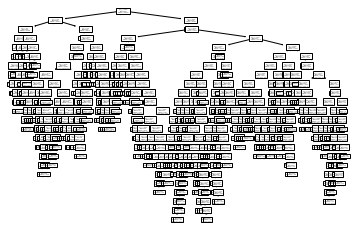

In [10]:
tree.plot_tree(decisiontree)

In [11]:
import pickle

In [12]:
folder = "classifier/"
classifierFileName = "DecisionTreeDefault.sav"
pickle.dump(decisiontree, open(folder+classifierFileName, "wb"))

In [13]:
"""
Load_decisionTree = pickle.load(open(folder+classifierFileName, "rb"))
"""

'\nLoad_decisionTree = pickle.load(open(folder+classifierFileName, "rb"))\n'

In [14]:
testFile = "data/redteam.txt"
testdata, mapList = readRedTeam(testFile, mapList)

In [15]:
testdata = np.array(testdata)

In [16]:
#separate testX,testy

testX = testdata[:,:2]
testy = testdata[:,[2]]

print(np.shape(testX))
print(np.shape(testy))

(749, 2)
(749, 1)


In [17]:
result = decisiontree.score(testX, testy)
print(result)

0.056074766355140186


In [18]:
correct = 0
incorrect = 0

for t in testX:
    result = decisiontree.predict([t])
    #print(result)
    #threshold 0.5
    if result>0.5:
        correct = correct + 1
    else:
        incorrect = incorrect + 1

In [19]:
print("correct: "+str(correct)+" incorrect: "+str(incorrect))

correct: 42 incorrect: 707
